In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')


---
### <font color="orange"><i>Сложная часть</i></font>

### Задача 2

<a target="_blank" href="https://www.yelp.com/">Yelp</a> — веб-сайт для поиска на местном рынке услуг, например ресторанов или парикмахерских, с возможностью добавлять и просматривать рейтинги и обзоры этих услуг. Для популярных бизнесов имеются сотни обзоров. Для обозревателей на сайте предусмотрены элементы социальной сети.

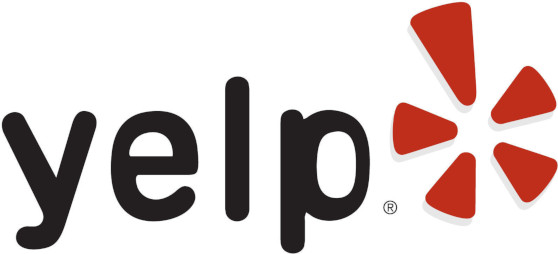

_____________

Вам предоставляется следующая информация о компаниях на Yelp:

Файл `yelp_business.csv`:
* `business_id` — уникальный идентификатор компании;
* `name` — имя компании;
* `address`, `city`, `state` — месторасположении компании;
* `latitude`, `longitude` — географические координаты;
* `categories` — категории услуг компании.

Файл `yelp_review.csv`, содержащий оценки пользователей:
* `business_id` — идентификатор компании, соответствующий файлу `yelp_business.csv`;
* `stars` — поставленная пользователем оценка от 1 до 5.

В целях сокращения объема файла, текстовые отзывы пользователей не были включены.

Оригинальную версию датасета в формате `json` можно посмотреть по <a target="_blank" href="https://www.kaggle.com/yelp-dataset/yelp-dataset/data">ссылке</a>, но использовать нужно выданные данные.

_____________

**Что нужно сделать:** 

* Найти город с наибольшим количеством компаний;
* Для этого города определить районы с наиболее качественными услугами. <a target="_blank" href="https://yandex.ru/company/researches/2017/msk_mobile_map">Пример</a> с несколько другой задачей.
* А также найти рестораны с наилучшими отзывами.


*Далее в условии встречаются различные подсказки, как можно выполнить определенные части задачи. Вы можете их игнорировать и делать иным способом для получения **того же самого промежуточного результата**. Однако, если ваше решение окажется **значительно** менее эффективным (по скорости, количеству и красоте кода) по сравнению с предполагаемым, баллы могут быть снижены.* 

------

#### 1. Город с наибольшим количеством компаний

Загрузите данные из файла `yelp_business.csv` с помощью функции `pd.read_csv`. Посмотрите на первые несколько строк с помощью метода `head`.

In [67]:
data = pd.read_csv('yelp_business.csv')
data.head()

Unnamed: 0             business_id                        name  \
0           0  FYWN1wneV18bWNgQjJ2GNg          "Dental by Design"   
1           1  He-G7vWjzVUysIKrfNbPUQ       "Stephen Szabo Salon"   
2           2  KQPW8lFf1y5BT2MxiSZ3QA     "Western Motor Vehicle"   
3           3  8DShNS-LuFqpEWIp0HxijA          "Sports Authority"   
4           4  PfOCPjBrlQAnz__NXj9h_w  "Brick House Tavern + Tap"   

  neighborhood                           address            city state  \
0          NaN        "4855 E Warner Rd, Ste B9"       Ahwatukee    AZ   
1          NaN              "3101 Washington Rd"        McMurray    PA   
2          NaN          "6025 N 27th Ave, Ste 1"         Phoenix    AZ   
3          NaN  "5000 Arizona Mills Cr, Ste 435"           Tempe    AZ   
4          NaN                    "581 Howe Ave"  Cuyahoga Falls    OH   

  postal_code   latitude   longitude  is_open  \
0       85044  33.330690 -111.978599        1   
1       15317  40.291685  -80.104900        1   
2       85017  33.524903 -112.115310        1   
3       85282  33.383147 -111.964725        0   
4       44221  41.119535  -81.475690        1   

                                          categories  
0  Dentists;General Dentistry;Health & Medical;Or...  
1  Hair Stylists;Hair Salons;Men's Hair Salons;Bl...  
2  Departments of Motor Vehicles;Public Services ...  
3                            Sporting Goods;Shopping  
4  American (New);Nightlife;Bars;Sandwiches;Ameri...

Найдите пять городов, по которым присутствует информация о наибольшем количестве компаний. В таблице должен быть указан город (название) и количество компаний в этом городе.

*Подсказка.* Для выполнения стоит воспользоваться методами `groupby`, `count`, `sort_values`, `head`.

In [68]:
cities_counts = data['city'].value_counts().reset_index()
cities_counts.columns = ['city', 'count']
top_five = cities_counts.head(5)
print(top_five)

         city  count
0   Las Vegas  26775
1     Phoenix  17213
2     Toronto  17206
3   Charlotte   8553
4  Scottsdale   8228


Пусть `N` &mdash; город с наибольшим количеством компаний. Оставьте в таблице только записи, соответствующие городу `N`. Нанесите все эти компании на график, в котором по оси $x$ отметьте долготу, а по оси $y$ &mdash; широту.

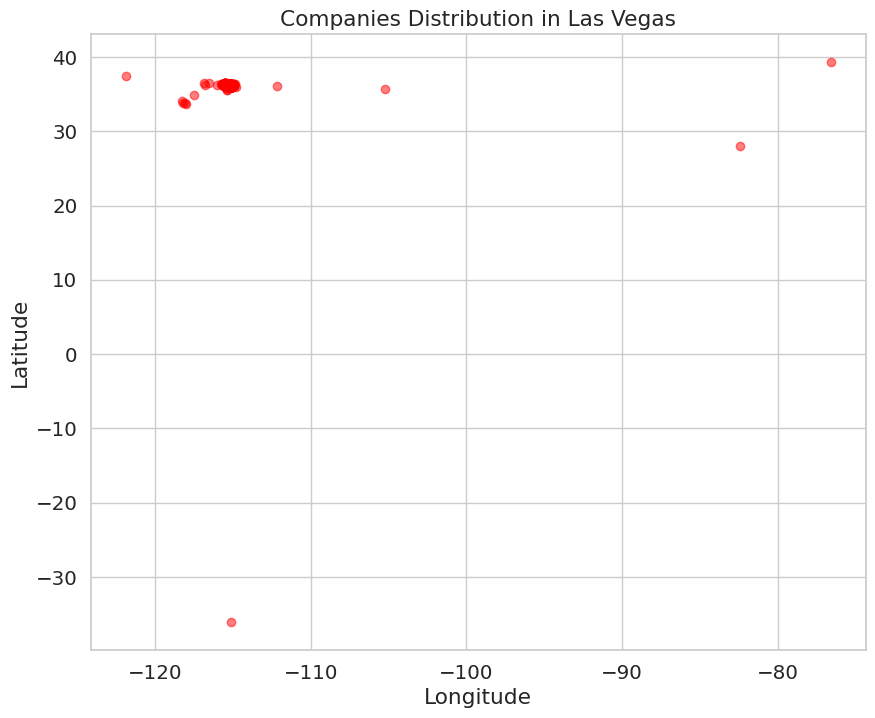

In [69]:
filtered_df = data[data['city'] == top_five.iloc[0]['city']]
plt.figure(figsize=(10, 8))
plt.scatter(filtered_df['longitude'], filtered_df['latitude'], alpha=0.5, color='red')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Companies Distribution in Las Vegas')
plt.grid(True)
plt.show()

Сам город находится в сгустке точек. Есть какие-то компании, которые приписаны к этому городу, но находятся далеко от него. Избавьтесь от них, подобрав некоторые границы значений широты и долготы. Изобразите все компании на новом графике. На этом графике должны выделяться некоторые улицы. 

In [70]:
import plotly.express

center_latitude = filtered_df['latitude'].mean()
center_longitude = filtered_df['longitude'].mean()

range_value = 0.23

filtered_companies = filtered_df[
    (filtered_df['latitude'] >= center_latitude - range_value) &
    (filtered_df['latitude'] <= center_latitude + range_value) &
    (filtered_df['longitude'] >= center_longitude - range_value) &
    (filtered_df['longitude'] <= center_longitude + range_value)
]

fig = plotly.express.scatter(filtered_companies, 
                 x="longitude", 
                 y="latitude", 
                 hover_name="name", 
                 title="Companies Distribution in Las Vegas")

fig.show()


Разберитесь с тем, как подгрузить интерактивную карту города в качестве фона графика. Можно пойти двумя следующими способами.
1. Изучить <a href="https://miptstats.github.io/courses/python/11_plotly.html" target="_blank">материалы</a> по библиотеке <a href="https://plotly.com/python/" target="_blank"><b>Plotly</b></a>. Возможно, потребуется также заглянуть в документацию.
1. Поразбираться с библиотекой <a href="https://github.com/python-visualization/folium" target="_blank"><b>Folium</b></a>. Посмотрите множество <a href="https://nbviewer.org/github/python-visualization/folium/tree/main/examples/" target="_blank">примеров</a>, может также помочь <a href="https://proglib.io/p/python-web-map" target="_blank">статья на русском</a>.

*Внимание!* Интерактивная карта может не сохраниться в ноутбуке, а если сохранится, то вес ноутбука может превзойти 20 Мб, и его не получится отправить боту. В любом случае **<u>необходимо сохранить карту в html и отправить ее отдельным файлом в бот.</u>** При этом каждый файл html должен не превышать 20 Мб, присылать файлы в архиве нельзя. Аналогично со всеми следующими интерактивными графиками в этом задании.

In [71]:
fig = plotly.express.scatter_mapbox(pd.DataFrame(filtered_companies), 
                        lat="latitude", 
                        lon="longitude", 
                        hover_name="name", 
                        zoom=14)

fig.write_html("interactive_map_1.html")

fig.update_layout(mapbox_style="open-street-map")

fig.show()

Если все получилось, вы молодцы! Далее в этой задаче тоже стройте интерактивные карты. Если нет желания разбираться с интерактивными графиками, можно построить статичные, но баллы будут снижены.

#### 2. Оценки компаний

Для выполнения задания нужно посчитать среднюю оценку каждой компании, а также количество выставленных оценок.

Загрузите таблицу оценок `yelp_review.csv`.

In [72]:
data_review = pd.read_csv('yelp_review.csv')
data_review.head()

Unnamed: 0             business_id  stars
0           0  AEx2SYEUJmTxVVB18LlCwA      5
1           1  VR6GpWIda3SfvPC-lg9H3w      5
2           2  CKC0-MOWMqoeWf6s-szl8g      5
3           3  ACFtxLv8pGrrxMm6EgjreA      4
4           4  s2I_Ni76bjJNK9yG60iD-Q      4

В подгруженной таблице оценок оставьте только компании города `N`. Для этого установите значения `business_id` в качестве индекса у таблицы оценок и воспользуйтесь методом `loc`. 

*Подсказка.* Чтобы индекс снова сделать полем таблицы, можно воспользоваться методом `reset_index`.

In [73]:
tc_reviews = data_review.set_index('business_id').loc[data[data['city'] == top_five.iloc[0]['city']]['business_id']].reset_index()
print(tc_reviews.head())

              business_id  Unnamed: 0  stars
0  kCoE3jvEtg6UVz5SOD3GVw      456053      4
1  kCoE3jvEtg6UVz5SOD3GVw     1093900      1
2  kCoE3jvEtg6UVz5SOD3GVw     2039047      5
3  kCoE3jvEtg6UVz5SOD3GVw     2979380      5
4  kCoE3jvEtg6UVz5SOD3GVw     4844650      5


Теперь посчитайте среднюю оценку каждой компании, а также количество выставленных компании оценок. 

*Подсказка.* Помочь в этом могут функции `groupby` и `aggregate([np.mean, np.size])`.

In [74]:

tc_agg = tc_reviews.groupby('business_id').aggregate({'stars': ["mean", "size"]})
tc_agg.columns = ['Average Rating', 'Number of Reviews']
tc_agg.reset_index(inplace=True)
tc_agg.head()

business_id  Average Rating  Number of Reviews
0  --9e1ONYQuAa-CB_Rrw7Tw        4.088904               1451
1  --DdmeR16TRb3LsjG0ejrQ        3.200000                  5
2  --WsruI0IGEoeRmkErU5Gg        4.928571                 14
3  --Y7NhBKzLTbNliMUX_wfg        4.875000                  8
4  --e8PjCNhEz32pprnPhCwQ        3.473684                 19

Назовите колонки таблицы красивыми именами, изменив `<имя таблицы>.columns`, после чего напечатайте несколько строк полученной таблицы. Красивые имена &mdash; то, что будет понятно простому человеку при чтении ваших результатов. Как именно их назвать &mdash; задача аналитика, то есть в данном случае ваша :)

In [75]:
tc_agg.columns = ['Business ID', 'Average Rating', 'Number of Reviews']
tc_agg.head()


Business ID  Average Rating  Number of Reviews
0  --9e1ONYQuAa-CB_Rrw7Tw        4.088904               1451
1  --DdmeR16TRb3LsjG0ejrQ        3.200000                  5
2  --WsruI0IGEoeRmkErU5Gg        4.928571                 14
3  --Y7NhBKzLTbNliMUX_wfg        4.875000                  8
4  --e8PjCNhEz32pprnPhCwQ        3.473684                 19

Соедините две полученные ранее таблицы по компаниям города `N` в одну.
Для этого сначала установите поле `business_id` в качестве индекса в обеих таблицах с помощью `set_index`. В одной из них это уже должно было быть сделано.
В полученной таблице должны получится поля `latitude`, `longitude`, `categories`, `name`, а также две колонки со средней оценкой компаний и количеством оценок, которые вы посчитали выше.

*Подсказка.* Соединение таблиц можно выполнить с помощью `join`.
Индексы у этих таблиц одинаковые, так что тип джойна не имеет значения.

In [76]:
filtered_dff = filtered_df.join(tc_agg.set_index('Business ID'), on='business_id')
filtered_dff.set_index('business_id')
filtered_dff = filtered_dff.filter(items=['latitude', 'longitude', 'categories', 'name', 'Average Rating', 'Number of Reviews'])
filtered_dff.head()

latitude   longitude                                         categories  \
6   36.207430 -115.268460  Real Estate Services;Real Estate;Home Services...   
7   36.197484 -115.249660                            Shopping;Sporting Goods   
26  36.085051 -115.119421       Shopping;Jewelry;Watch Repair;Local Services   
41  36.056382 -115.269332  Home Services;Lighting Fixtures & Equipment;Lo...   
48  36.105196 -115.056880       Nurseries & Gardening;Home & Garden;Shopping   

                   name  Average Rating  Number of Reviews  
6          "BDJ Realty"        4.000000                  5  
7         "Soccer Zone"        1.444444                  9  
26  "Alfredo's Jewelry"        4.739130                 23  
41      "Task Electric"        4.450000                 20  
48       "Star Nursery"        3.680000                 25

Изобразите все компании на графике, раскрасив точку в цвет, оттенок которого соответствует средней оценке компании. Прозрачность точки выставляйте не более $0.3$. Если у одной компании несколько филиалов с разными адресами, наносите на график все адреса.

In [77]:
fig = plotly.express.scatter_mapbox(filtered_dff, 
                        lat="latitude", 
                        lon="longitude", 
                        color="Average Rating",  
                        hover_name="name", 
                        hover_data=["Average Rating"], 
                        color_continuous_scale=plotly.express.colors.diverging.Portland,  
                        opacity=0.3,  
                        zoom=10)  

fig.write_html("interactive_map_2.html")

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_layout(title='Companies by Average Rating')

fig.show()




Чтобы получить районы города, то есть разделить город на "клетки", округлите значения широты и долготы, подобрав оптимальный размер района. 

*Подсказка.* Например, можно сделать так
`np.round(долгота*4, decimals=1)*0.25`.

In [78]:
filtered_dff['rounded_lat'] = filtered_dff['latitude'].apply(lambda x: round(x, 2))
filtered_dff['rounded_lon'] = filtered_dff['longitude'].apply(lambda x: round(x, 2))
filtered_dff.head()

latitude   longitude                                         categories  \
6   36.207430 -115.268460  Real Estate Services;Real Estate;Home Services...   
7   36.197484 -115.249660                            Shopping;Sporting Goods   
26  36.085051 -115.119421       Shopping;Jewelry;Watch Repair;Local Services   
41  36.056382 -115.269332  Home Services;Lighting Fixtures & Equipment;Lo...   
48  36.105196 -115.056880       Nurseries & Gardening;Home & Garden;Shopping   

                   name  Average Rating  Number of Reviews  rounded_lat  \
6          "BDJ Realty"        4.000000                  5        36.21   
7         "Soccer Zone"        1.444444                  9        36.20   
26  "Alfredo's Jewelry"        4.739130                 23        36.09   
41      "Task Electric"        4.450000                 20        36.06   
48       "Star Nursery"        3.680000                 25        36.11   

    rounded_lon  
6       -115.27  
7       -115.25  
26      -115.12  
41      -115.27  
48      -115.06

Для получения средней оценки компаний по району постройте сводную таблицу при помощи `pd.pivot_table`, взяв в качестве индексов и колонок округленные широту и долготу, а в качестве значений &mdash; оценки. Аггрегирующей функцией является среднее.

Изобразите полученную таблицу при помощи `sns.heatmap`.

*Замечание.* В качестве среднего можно было бы посчитать как общее среднее по всем оценкам всех компаний, так и среднее по компаниям их средних оценок. В чем разница этих подходов? Какой из них необходимо использовать в данном случае?

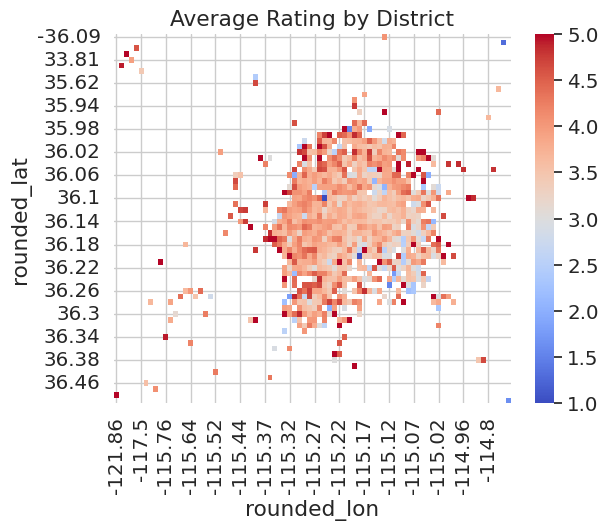

In [79]:
review_pivot = pd.pivot_table(filtered_dff, values='Average Rating', index='rounded_lat', columns='rounded_lon', aggfunc='mean')
review_pivot.head()
sns.heatmap(review_pivot, cmap='coolwarm', vmin=1, vmax=5)
plt.title('Average Rating by District')
plt.show()


Полученный график имеет ряд недостатков. Во-первых, не очень правильно судить о районе, если в нем мало компаний. Во-вторых,  на графике цветовая гамма автоматически подстроилась под минимальное и максимальное значения оценки.

Почему эти недостатки могут быть существенными?

**Ответ:** Условно, если в районе 2 компании с совершенно разными оценками, то среднее значение может быть неинформативным. Также автоматическое масштабирование цветовой гаммы может усложнить сравнение различных районов между собой

Оставьте районы, в которых имеется информация о не менее $30$ компаний. Постройте новый график районов, использовав параметры `vmin` и `vmax` у функции `sns.heatmap`.

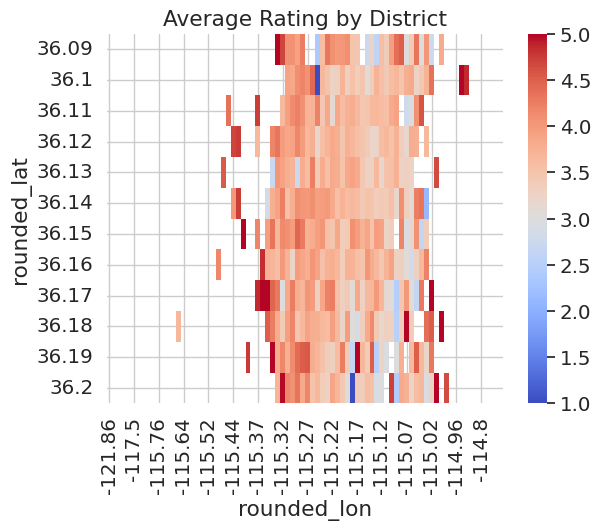

In [80]:
valid_regions = review_pivot[(review_pivot.notnull()).sum(axis=1) >= 30]
valid_regions.head()
sns.heatmap(valid_regions, cmap='coolwarm', vmin=1, vmax=5)
plt.title('Average Rating by District')
plt.show()

Сравните полученный график с предыдущим и сделайте вывод.

**Вывод:** Сделав ограничение на 30 компаний, мы получаем более точную картину оценок услугв разных частях города

#### 3. Рестораны

Будем считать компанию рестораном, если в поле `categories` *содержится* слово `restaurant`. Обратите внимание, что в анализе данных часто нет четкого формата данных. Например, данное слово может быть написано как с большой буквы, так и с маленькой; может как разделяться `;`, так и не разделяться. При возникновении недопонимания стоит посмотреть данные.

Составьте таблицу, в которой будет информация о всех ресторанах города `N`, для которых имеется не менее $5$ отзывов. Далее постройте heatmap-график районов, в котором каждому району сопоставьте среднюю оценку по ресторанам этого района. Рассматривайте только те районы, в которых есть не менее $10$ ресторанов, для каждого из которых есть не менее $5$ отзывов.

/tmp/ipykernel_3288/2087167922.py:5: FutureWarning:

The provided callable <function mean at 0x7fa2181d83a0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.

/tmp/ipykernel_3288/2087167922.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_3288/2087167922.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



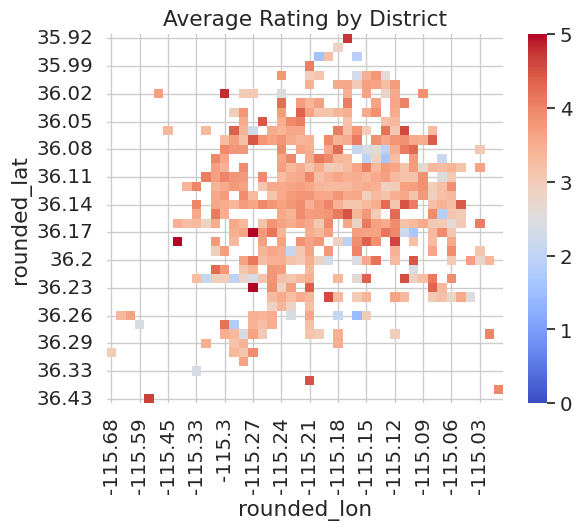

In [81]:
N_data = data[data['city'] == top_five.iloc[0]['city']]
restaurants = N_data[N_data['categories'].str.contains('restaurant', case=False, na=False)]

restaurants_reviews = tc_reviews[tc_reviews['business_id'].isin(restaurants['business_id'])]
restaurants_agg = restaurants_reviews.groupby('business_id').aggregate({'stars': [np.mean, np.size]})
restaurants_agg.columns = ['Average Rating', 'Number of Reviews']
restaurants_agg.reset_index(inplace=True)
restaurants_agg.columns = ['Business ID', 'Average Rating', 'Number of Reviews']

filtered_restaurants = restaurants.join(restaurants_agg.set_index('Business ID'), on='business_id')
filtered_restaurants_reviews = filtered_restaurants[filtered_restaurants['Number of Reviews'] >= 5]

filtered_restaurants_reviews['rounded_lat'] = filtered_restaurants_reviews['latitude'].apply(lambda x: round(x, 2))
filtered_restaurants_reviews['rounded_lon'] = filtered_restaurants_reviews['longitude'].apply(lambda x: round(x, 2))

review_pivot_restaurants = pd.pivot_table(filtered_restaurants_reviews, values='Average Rating', index='rounded_lat', columns='rounded_lon', aggfunc='mean')
valid_regions_restaurants = review_pivot_restaurants[(review_pivot_restaurants.notnull()).sum(axis=1) >= 0]

sns.heatmap(valid_regions_restaurants, cmap='coolwarm', vmin=0, vmax=5)
plt.title('Average Rating by District')
plt.show()





Чем полезны ограничения снизу на количество отзывов для ресторана и количество ресторанов в районе?

**Ответ:** Установка минимального количества отзывов позволяет более точно оценить качество ресторана. Также при установке минимального количества ресторанов в районе можно более надежно оценить общее качество заведений в этом районе. Если в районе есть только несколько ресторанов, то средняя оценка может быть сильно искажена.

Кот Василий из города `N` очень придирчив к выбору ресторана. Он доверяет только ресторанам с высоким рейтингом, который основывается на большом количестве отзывов. Напечатайте в виде таблицы информацию $10$ ресторанах с самым большим рейтингом в порядке убывания рейтинга. Для каждого из этих ресторанов должно быть не менее $50$ отзывов. По каждому ресторану необходимо вывести следующую информации: название ресторана, средняя оценка, количество отзывов, географические координаты, категории.

In [82]:
top_restaurants = filtered_restaurants_reviews[filtered_restaurants_reviews['Number of Reviews'] >= 50]

top_restaurants = top_restaurants.sort_values(by='Average Rating', ascending=False)

top_10_restaurants = top_restaurants.head(10)[['name', 'Average Rating', 'Number of Reviews', 'latitude', 'longitude', 'categories']]

top_10_restaurants


name  Average Rating  Number of Reviews  \
22863     "Lip Smacking Foodie Tours"        4.966480                179   
165971                 "Pepito Shack"        4.907692                 65   
109391               "Bosa Boba Cafe"        4.890909                 55   
167803                 "Garden Grill"        4.868132                 91   
13577                  "Brew Tea Bar"        4.848069               1165   
124895               "Poppa Naps BBQ"        4.836538                104   
78897                "Zenaida's Cafe"        4.833333                180   
78362    "El Frescos Cocina Mexicana"        4.816754                191   
34418   "Blaqcat Ultra Hookah Lounge"        4.809524                 63   
154726     "California Sushi Burrito"        4.807018                 57   

         latitude   longitude  \
22863   36.114537 -115.172678   
165971  36.152477 -115.151945   
109391  36.125960 -115.184846   
167803  36.166783 -115.286197   
13577   36.054195 -115.242443   
124895  36.116549 -115.088115   
78897   36.101741 -115.100359   
78362   36.098527 -115.148446   
34418   36.159742 -115.232738   
154726  36.125636 -115.202487   

                                               categories  
22863   Food Tours;Restaurants;Event Planning & Servic...  
165971  Restaurants;Burgers;Food Stands;Sandwiches;Hot...  
109391  Vietnamese;Bubble Tea;Sandwiches;Food;Coffee &...  
167803  Tacos;Street Vendors;Farmers Market;Vegetarian...  
13577   Cafes;Tea Rooms;Food;Bubble Tea;Restaurants;De...  
124895  Food Stands;Hot Dogs;Caterers;Restaurants;Amer...  
78897                Restaurants;Breakfast & Brunch;Cafes  
78362   Caterers;Mexican;Restaurants;Food;Event Planni...  
34418   Adult Entertainment;Lounges;Hookah Bars;Restau...  
154726  Asian Fusion;Fast Food;Restaurants;Japanese;Po...

Нанесите на карту все рестораны со средней оценкой не менее $4.7$, которая посчитана по не менее $50$ отзывам. Отдельным цветом отметьте 10 ресторанов, которые вы получили ранее.

In [83]:
top_restaurants_vasya = top_restaurants[top_restaurants['Average Rating'] >= 4.7]

fig = plotly.express.scatter_mapbox(top_restaurants_vasya, lat="latitude", lon="longitude", hover_name="name", hover_data=["Average Rating", "Number of Reviews", "categories"],
                        color="Average Rating", color_continuous_scale=plotly.express.colors.diverging.Portland,
                        size="Number of Reviews", size_max=15, zoom=10)

fig.update_traces(marker=dict(size=10, opacity=0.8))
top_10_trace = plotly.express.scatter_mapbox(
    top_10_restaurants, lat="latitude", lon="longitude", hover_name="name"
).data[0]

top_10_trace.marker.update(color='purple')

fig.add_trace(top_10_trace)

fig.update_layout(mapbox_style="open-street-map")
fig.write_html("interactive_map_3.html")

fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.write_html("interactive_map_3.html")

fig.show()

Охарактеризуйте кота Василия, а также сделайте общий вывод по задаче.

**Вывод:** кот Василий довольно-таки придирчив к выбору заведений общепита, но благодаря нашей интерактивной карте ему будет намного легче выбрать подходящий для себя ресторан :)